In [44]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
env = gym.make('FrozenLake-v0')
env.reset()
env.render()
print(env.step(1))
env.render()
a = env.action_space.sample()
print(a)

[2017-04-30 20:28:03,605] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG
(4, 0.0, False, {'prob': 0.3333333333333333})
  (Down)
SFFF
FHFH
FFFH
HFFG
3


In [46]:
tf.reset_default_graph()

In [47]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W1 = tf.Variable(tf.random_uniform([16,8], 0, 0.01))
W2 = tf.Variable(tf.random_uniform([8,4], 0, 0.01))
Qout = tf.matmul(tf.matmul(inputs1,W1), W2)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [55]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if i == 0 and j == 1:
                print(allQ.shape)
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            if i == 0 and j == 1:
                print(Q1.shape)
                print(np.max(Q1))

            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,_W1,_W2 = sess.run([updateModel,W1,W2],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

(1, 4)
(1, 4)
0.000227002
Percent of succesful episodes: 0.048%


[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

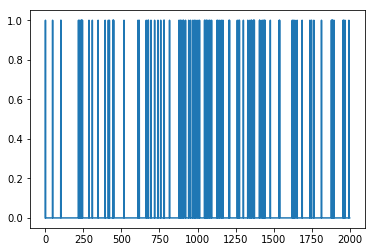

In [49]:
plt.plot(rList)
print(rList)

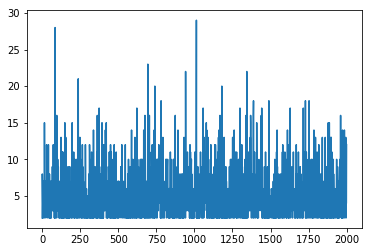

In [50]:
plt.plot(jList)

In [15]:
print(jList)

[13, 18, 9, 9, 5, 20, 9, 19, 26, 4, 10, 25, 6, 26, 6, 14, 6, 4, 16, 35, 11, 18, 39, 32, 3, 3, 5, 26, 9, 23, 24, 3, 2, 2, 3, 14, 9, 5, 6, 10, 18, 11, 12, 19, 4, 54, 2, 25, 4, 30, 18, 23, 39, 39, 34, 3, 52, 11, 6, 3, 15, 13, 11, 2, 15, 9, 4, 4, 36, 17, 15, 13, 12, 17, 9, 17, 18, 20, 12, 14, 37, 9, 35, 8, 5, 3, 17, 13, 6, 5, 6, 14, 40, 35, 8, 23, 3, 8, 6, 8, 6, 12, 28, 9, 8, 22, 4, 4, 10, 12, 4, 7, 15, 10, 4, 6, 19, 9, 16, 8, 7, 30, 80, 15, 16, 5, 22, 26, 7, 4, 6, 10, 14, 8, 11, 8, 15, 11, 9, 10, 3, 6, 18, 13, 5, 24, 4, 4, 13, 7, 13, 8, 5, 62, 18, 7, 3, 15, 7, 8, 17, 53, 9, 49, 12, 13, 24, 6, 7, 11, 7, 7, 9, 20, 13, 9, 76, 9, 16, 17, 16, 10, 11, 13, 22, 21, 3, 5, 23, 8, 12, 20, 22, 3, 24, 4, 10, 3, 22, 9, 43, 26, 18, 5, 12, 31, 22, 11, 9, 6, 12, 4, 8, 30, 3, 9, 19, 19, 16, 3, 41, 8, 6, 10, 11, 6, 14, 48, 90, 7, 6, 21, 27, 18, 73, 9, 11, 6, 9, 10, 9, 16, 10, 11, 15, 17, 22, 22, 13, 11, 3, 3, 12, 21, 26, 6, 25, 12, 51, 10, 10, 9, 23, 3, 5, 22, 10, 12, 14, 35, 15, 13, 6, 13, 8, 4, 59, 24, 65

In [38]:
np.identity(16)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0